In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dataset = pd.read_csv('train1.csv')


In [3]:
Project5= pd.DataFrame(dataset)

In [4]:
Project5 = Project5.drop(columns=['Unnamed: 0', 'id'])


In [5]:
Project5['Arrival Delay in Minutes'].fillna(Project5['Arrival Delay in Minutes'].median(), inplace=True)


In [6]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(Project5[categorical_cols])


In [7]:
encoded_Project5 = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())


In [8]:
Project5_numeric = Project5.drop(columns=categorical_cols + ['satisfaction']).reset_index(drop=True)
Project5_final = pd.concat([Project5_numeric, encoded_Project5], axis=1)

In [9]:
Project5_final.info(), Project5_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int64  
 1   Flight Distance                    103904 non-null  int64  
 2   Inflight wifi service              103904 non-null  int64  
 3   Departure/Arrival time convenient  103904 non-null  int64  
 4   Ease of Online booking             103904 non-null  int64  
 5   Gate location                      103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Online boarding                    103904 non-null  int64  
 8   Seat comfort                       103904 non-null  int64  
 9   Inflight entertainment             103904 non-null  int64  
 10  On-board service                   103904 non-null  int64  
 11  Leg room service                   1039

(None,    Age  Flight Distance  Inflight wifi service  \
 0   13              460                      3   
 1   25              235                      3   
 2   26             1142                      2   
 3   25              562                      2   
 4   61              214                      3   
 
    Departure/Arrival time convenient  Ease of Online booking  Gate location  \
 0                                  4                       3              1   
 1                                  2                       3              3   
 2                                  2                       2              2   
 3                                  5                       5              5   
 4                                  3                       3              3   
 
    Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
 0               5                3             5                       5  ...   
 1               1                3     

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Project5_final)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans

KMeans(n_clusters=5, random_state=42)

In [13]:
inertia = []
K_range = range(1, 11)

In [14]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [15]:
y_kmeans = kmeans.fit_predict(X_scaled)

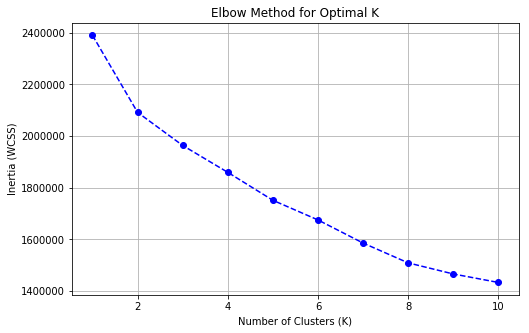

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [17]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
Project5_final['Cluster'] = kmeans.fit_predict(X_scaled)

In [18]:
from sklearn.decomposition import PCA


In [19]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

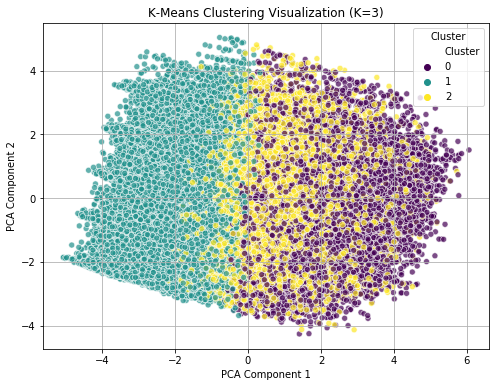

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=Project5_final['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"K-Means Clustering Visualization (K={optimal_k})")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()